# CRISP-DM Framework for Final Project

## 1. Business Understanding

### Business Objective
The primary objective is to build a Recipe Recommendation System, Sentiment Analysis model, and Cultural Cuisine using the provided datasets. The goal is to enhance user experience by offering personalized recipe suggestions and analyzing user feedback to improve content.

### Stakeholders
- **Platform Users:** Seek personalized and diverse recipe recommendations to explore new dishes and enhance their cooking    skills.
- **Developers & Data Science Team:** Responsible for model development, data integration, and ensuring the system operates smoothly.
- **Business Analysts:** Utilize insights from user interactions and feedback to identify popular trends, user preferences, and potential areas for growth.

### Key Business Questions
- What factors influence user preferences for recipes?
- Can user sentiments help improve content recommendations?
- How can we leverage data to suggest recipes that align with user dietary restrictions or preferences?
- What are the key metrics indicating high user engagement?
- How can we ensure the recommendation system remains relevant over time?


### EDA Integration
1. What are the most common ingredients used across all cuisines?
2. How does the nutritional content vary across different cuisines?
3. What trends can be observed in user interactions over time?
4. Are there seasonal patterns in user engagement with recipes?
5. Which cuisines receive the most positive/negative feedback?


### Hypothesis Testing
- **H0:** Higher levels of total fat are associated with increased calorie content and saturated fat in foods.  
- **H1:** "Higher levels of total fat are associated with decreased or no significant change in calorie content and saturated fat in foods."User sentiment significantly impacts recipe engagement.

### Importance of the Project
- This project aims to create an engaging platform that not only provides users with personalized recipes but also fosters a community around cooking.
- By analyzing user feedback and preferences, we can continually refine our offerings, ensuring that users find value in the recommendations and the content provided. This will help increase user retention, satisfaction, and overall platform growth.

In [3]:
# Loading in the libraries neccesary
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [4]:
#Loading in the data
nutrition_data = pd.read_csv(r"nutritions.csv") 
interactions = pd.read_csv(r"RAW_interactions.csv")
International_recipes = pd.read_csv(r"RAW_recipes.csv")
African_recipes = pd.read_csv(r"African_recipes.csv")

In [5]:
# Getting the columns that we have in our International_recipe dataset
International_recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [6]:
# Getting the columns that we have in our nutrition dataset
nutrition_data.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

## Data Preprocessing and cleaning

### Column Names:

#### International Recipes Data
- **name**; Name of the recipe
- **id**; Unique identifier for the recipe
- **minutes**; Time required to prepare the recipe (in mins)
- **tag**; Tags associated with the recipe
- **steps**; Step-by-step instructions for preparation
- **ingredients**; List of ingredients used
- **calories**; Caloric content per serving
- **total fat (PDV)**; Total fat content as a percentage of daily value
- **sugar (PDV)**; Sugar content as a percentage of daily value
- **sodium (PDV)**; Sodium content as a percentage of daily value
- **protein (PDV)**; Protein content as a percentage of daily value
- **saturated fat (PDV)**; Saturated fat content as a percentage of daily value
- **carbohydrates (PDV)**; Carbohydrate content as a percentage of daily value

#### Nutrition Data
- **name**;	Name of the food item
- **serving_size**; Size of the serving (in grams or milliliters)
- **calories**;	Caloric content per serving
- **total_fat**;	Total fat content (in grams)
- **saturated_fat**;	Saturated fat content (in grams)
- **cholesterol**; Cholesterol content (in mg)
- **sodium**;	Sodium content (in mg)
- **potassium**;	Potassium content (in mg)
- **saturated_fatty_acids**;	Total saturated fatty acids (in grams)

#### Interactions Data
- **user_id**;	Unique identifier for the user
- **recipe_id**;	Unique identifier for the recipe
- **date**;	Date of interaction
- **rating**;	User's rating for the recipe
- **review**;	User's review or feedback


### Nutrition data

In [7]:
# Dropping all the irrelevant columns
columns_to_drop = [
    'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
    'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta', 'cryptoxanthin_beta',
    'lutein_zeaxanthin', 'lucopene', 'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d',
    'vitamin_e', 'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium',
    'manganese', 'phosphorous', 'selenium', 'zink', 'sugars', 'protein', 'alanine', 'arginine',
    'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline',
    'isoleucine', 'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
    'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'fructose',
    'galactose', 'glucose', 'lactose', 'maltose', 'sucrose', 'fat', 'monounsaturated_fatty_acids',
    'polyunsaturated_fatty_acids', 'fatty_acids_total_trans', 'alcohol', 'ash', 'caffeine',
    'theobromine', 'water'
]

nutrition_data.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Getting information about the nutrition data
nutrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             8789 non-null   int64 
 1   name                   8789 non-null   object
 2   serving_size           8789 non-null   object
 3   calories               8789 non-null   int64 
 4   total_fat              8789 non-null   object
 5   saturated_fat          7199 non-null   object
 6   cholesterol            8789 non-null   object
 7   sodium                 8789 non-null   object
 8   potassium              8789 non-null   object
 9   saturated_fatty_acids  8789 non-null   object
dtypes: int64(2), object(8)
memory usage: 686.8+ KB


In [9]:
# An overview of the nutrition dataset
nutrition_data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,potassium,saturated_fatty_acids
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,3.00 mg,0.009 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,410.00 mg,6.180 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,229.00 mg,0.034 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,427.00 mg,0.449 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,96.00 mg,1.160 g


Some of the columns in the nutrition datasets are of numeric datatypes but have object datatypes

In [10]:
# Cleaning the columns
columns_to_clean = ['serving_size', 'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'potassium']
for column in columns_to_clean:
    nutrition_data[column] = nutrition_data[column].astype(str)
    

In [11]:
# Remove 'g' and 'mg' from all string columns
for col in nutrition_data.columns:
    if nutrition_data[col].dtype == 'object':
        nutrition_data[col] = nutrition_data[col].str.replace(r'[gmg]', '', regex=True)

# Check the result
print(nutrition_data.head())


   Unnamed: 0            name serving_size calories total_fat saturated_fat  \
0           0      Cornstarch         100       381       0.1           nan   
1           1    Nuts, pecans         100       691        72           6.2   
2           2     Eplant, raw         100        25       0.2           nan   
3           3  Teff, uncooked         100       367       2.4           0.4   
4           4  Sherbet, orane         100       144         2           1.2   

  cholesterol  sodium potassium saturated_fatty_acids  
0           0   9.00      3.00                 0.009   
1           0   0.00    410.00                 6.180   
2           0   2.00    229.00                 0.034   
3           0  12.00    427.00                 0.449   
4           1  46.00     96.00                 1.160   


In [12]:
nutrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Unnamed: 0             8789 non-null   int64 
 1   name                   8789 non-null   object
 2   serving_size           8789 non-null   object
 3   calories               8789 non-null   object
 4   total_fat              8789 non-null   object
 5   saturated_fat          8789 non-null   object
 6   cholesterol            8789 non-null   object
 7   sodium                 8789 non-null   object
 8   potassium              8789 non-null   object
 9   saturated_fatty_acids  8789 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [13]:
# Checking for missing values
nutrition_data.isna().sum()

Unnamed: 0               0
name                     0
serving_size             0
calories                 0
total_fat                0
saturated_fat            0
cholesterol              0
sodium                   0
potassium                0
saturated_fatty_acids    0
dtype: int64

No missing values

In [14]:
# Checking for duplicated values
nutrition_data.duplicated().sum()

0

No duplicated values

## African Recipies data

In [15]:
# Getting information 
African_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 206 non-null    object 
 1   minutes              206 non-null    object 
 2   ingredients          206 non-null    object 
 3   steps                206 non-null    object 
 4   Serving              206 non-null    float64
 5   calories             206 non-null    int64  
 6   total fat (PDV)      206 non-null    int64  
 7   sugar (PDV)          206 non-null    int64  
 8   sodium (PDV)         206 non-null    int64  
 9   protein (PDV)        206 non-null    int64  
 10  saturated fat (PDV)  206 non-null    int64  
 11  carbohydrates (PDV)  206 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 19.4+ KB


In [16]:
# Checking for missing values
African_recipes.isna().sum()

name                   0
minutes                0
ingredients            0
steps                  0
Serving                0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [17]:
# Dropping missing values on the time column
African_recipes.dropna(inplace=True)

In [18]:
# Checking if missing values have been sorted
African_recipes.isna().sum()

name                   0
minutes                0
ingredients            0
steps                  0
Serving                0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [19]:
# Checking for duplicate values
African_recipes.duplicated().sum()

0

No Duplicates

In [20]:
African_recipes

,name,minutes,ingredients,steps,Serving,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,Ugali and omena,30,Maize flour\nOmena\nOil\n3 chopped tomatoes\nC...,Step 1\nBoil 3 cups of water add maize flour s...,4.0,91,30,203,29,192,172,182
1,Kienyeji fried,25,1 table spoon salt\n2 table spoon cooking vege...,Asemble the vegetables.\nPluck leaves from the...,1.0,230,173,247,196,87,200,239
2,dengu Chapati,30,Ndengu\ncubes congets diced in\ncubes carrots ...,Step 1\nSteam the mince meat and add oil then ...,4.0,138,211,131,260,84,75,275
3,Ugali matumbo ft african salad,60,400 g Maize flour \n20 g Onions \n11/2 kgMatum...,"Step 1 Bring the water to boil, add the maize ...",4.0,365,259,71,255,205,20,57
4,Chicken stew,60,Boiled chicken\n2 Red onion\n1 Spring onion\n4...,Step 1Boil 1 diced potato and 1 diced carrot\...,2.0,171,35,221,109,219,210,125
...,...,...,...,...,...,...,...,...,...,...,...,...
201,Traditional South African Bobotie,75,Mince filling:\n60 ml butter\n20 ml ground gin...,Step 1\nPreheat oven to 180°F celcius\nStep 2\...,4.0,632,201,259,229,85,91,215
202,My African salad,10,2 cups dried abacha\n1/2 cube seasoning\n2 tea...,Step 1\nGet a bowl and soak the dried abacha i...,3.0,975,49,139,15,200,193,219
203,Sweet mandazi,60,500 g White flour -\n250 ml Milk -\n20 g Bakin...,"Step 1\nIn a bowl, add sieved flour, sugar, ba...",4.0,786,91,294,43,271,192,135
204,Roasted Guinea fowl parts\nUmmul-khairi Ahmed,60,Guinea fowl parts\nchilli powder\nStar anice p...,Step 1\nWash ur Guinea fawl parts and allow it...,4.0,277,135,296,180,25,252,213


In [21]:
# Remove duplicate recipes based on the name
African_recipies = African_recipes.drop_duplicates(subset='name', keep='first')

# Standardize similar names
African_recipies['name'] = African_recipies['name'].str.lower().str.strip()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\423533099.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  African_recipies['name'] = African_recipies['name'].str.lower().str.strip()


# Recipies Data

In [22]:
# Getting only the important columns
columns_to_drop = ['contributor_id', 'submitted', 'description', 'n_steps', 'n_ingredients']
International_recipes = International_recipes.drop(columns=columns_to_drop)

In [23]:
# Getting info of the data
International_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   name         231636 non-null  object
 1   id           231637 non-null  int64 
 2   minutes      231637 non-null  int64 
 3   tags         231637 non-null  object
 4   nutrition    231637 non-null  object
 5   steps        231637 non-null  object
 6   ingredients  231637 non-null  object
dtypes: int64(2), object(5)
memory usage: 12.4+ MB


In [24]:
# Splitting the nutrition column into individual nutrients
International_recipes[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']] = International_recipes['nutrition'].str.split(",", expand=True)

# Removing extra characters from specific columns
International_recipes['calories'] = International_recipes['calories'].str.replace(r'\[', '', regex=True)
International_recipes['carbohydrates (PDV)'] = International_recipes['carbohydrates (PDV)'].str.replace(r'\]', '', regex=True)

In [25]:
# Droping the nutrients column
International_recipes.drop(['nutrition'], axis=1, inplace=True)

In [26]:
International_recipes.dtypes

name                   object
id                      int64
minutes                 int64
tags                   object
steps                  object
ingredients            object
calories               object
total fat (PDV)        object
sugar (PDV)            object
sodium (PDV)           object
protein (PDV)          object
saturated fat (PDV)    object
carbohydrates (PDV)    object
dtype: object

In [27]:
numeric_columns = ['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 
                    'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']

International_recipes[numeric_columns] = International_recipes[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [28]:
International_recipes.head()

,name,id,minutes,tags,steps,ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [29]:
# Cleaning the ingridients data
International_recipes['ingredients'] = International_recipes['ingredients'].str.replace(r"[^a-zA-Z0-9, ]", "", regex=True)


In [30]:
# Replacing the commas (,) ingridient data with spaces
International_recipes['ingredients'] = International_recipes['ingredients'].str.replace(',', ' ', regex=True)


In [31]:
International_recipes['ingredients']

0         winter squash  mexican seasoning  mixed spice ...
1         prepared pizza crust  sausage patty  eggs  mil...
2         ground beef  yellow onions  diced tomatoes  to...
3         spreadable cheese with garlic and herbs  new p...
4         tomato juice  apple cider vinegar  sugar  salt...
                                ...                        
231632    celery  onion  green sweet pepper  garlic clov...
231633    paprika  salt  garlic powder  onion powder  dr...
231634    hardcooked eggs  mayonnaise  dijon mustard  sa...
231635    butter  eagle brand condensed milk  light brow...
231636    granulated sugar  shortening  eggs  flour  cre...
Name: ingredients, Length: 231637, dtype: object

In [32]:
# Checking for missing values
International_recipes.isna().sum()

name                   1
id                     0
minutes                0
tags                   0
steps                  0
ingredients            0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [33]:
# Dropping the misisng values
International_recipes.dropna(subset=['name'],inplace=True)

In [34]:
# Checkingg info of the data
International_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231636 entries, 0 to 231636
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 231636 non-null  object 
 1   id                   231636 non-null  int64  
 2   minutes              231636 non-null  int64  
 3   tags                 231636 non-null  object 
 4   steps                231636 non-null  object 
 5   ingredients          231636 non-null  object 
 6   calories             231636 non-null  float64
 7   total fat (PDV)      231636 non-null  float64
 8   sugar (PDV)          231636 non-null  float64
 9   sodium (PDV)         231636 non-null  float64
 10  protein (PDV)        231636 non-null  float64
 11  saturated fat (PDV)  231636 non-null  float64
 12  carbohydrates (PDV)  231636 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 24.7+ MB


## Interaction data

In [35]:
# Getting info of the data
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1048575 non-null  int64 
 1   recipe_id  1048575 non-null  int64 
 2   date       1048575 non-null  object
 3   rating     1048575 non-null  int64 
 4   review     1048417 non-null  object
dtypes: int64(3), object(2)
memory usage: 40.0+ MB


In [36]:
# checking for missing values
interactions.isna().sum()

user_id        0
recipe_id      0
date           0
rating         0
review       158
dtype: int64

In [37]:
# Dropping missing values
interactions.dropna(subset=['review'],inplace=True)

In [38]:
# Checking for missing values
interactions.duplicated().sum()

0

No duplicates in the data

# Exploratory Data Analysis

## 1. What are the most common ingredients used across all cuisines?

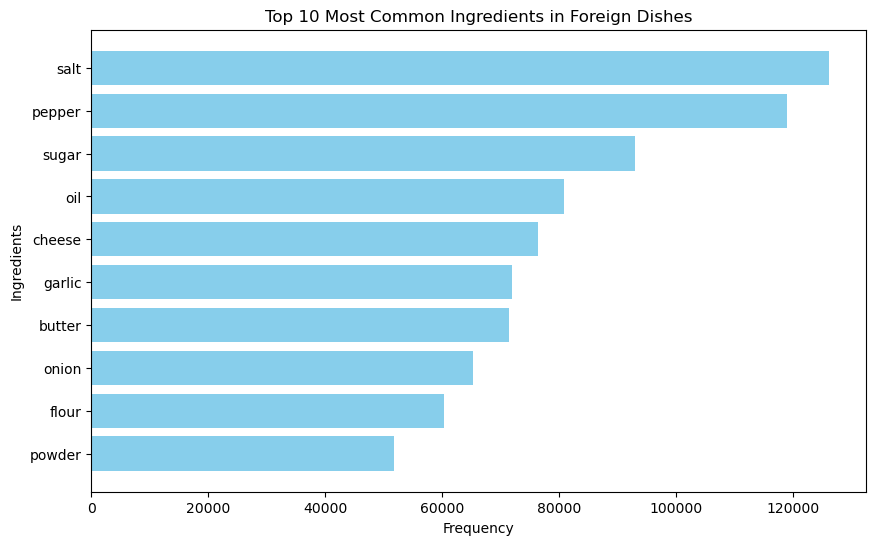

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Define common adjectives and stop words
adjectives = {'fresh', 'ground', 'chopped', 'sliced', 'crushed', 'dried'}
stop_words = {'to', 'taste', 'and', 'with', 'for', 'in', 'of'}

# Flatten and count ingredients
ingredient_counts = Counter()

for ingredients in International_recipes['ingredients']:
    if isinstance(ingredients, str):
        words = ingredients.lower().replace(',', '').split()
        
        # Combine adjectives with the following word
        for i, word in enumerate(words):
            if word in adjectives and i < len(words) - 1:
                combined = f"{word} {words[i+1]}"
                if words[i+1] not in stop_words:
                    ingredient_counts[combined] += 1
            elif word not in adjectives and word not in stop_words:
                ingredient_counts[word] += 1

# Get top 10 ingredients
top_10_ingredients = ingredient_counts.most_common(10)

# Convert to DataFrame for plotting
top_10_df = pd.DataFrame(top_10_ingredients, columns=['Ingredient', 'Count'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_10_df['Ingredient'], top_10_df['Count'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Ingredients')
plt.title('Top 10 Most Common Ingredients in Foreign Dishes')
plt.gca().invert_yaxis()
plt.show()


In [40]:
top_10_df.to_csv("Top 10 International ingridients.csv", index=False)

In [41]:
International_recipes.head()

,name,id,minutes,tags,steps,ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs mil...,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes to...,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new p...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",['mix all ingredients& boil for 2 1 / 2 hours ...,tomato juice apple cider vinegar sugar salt...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [42]:
top_10_df

,Ingredient,Count
0,salt,126148
1,pepper,118940
2,sugar,93034
3,oil,80800
4,cheese,76382
5,garlic,71913
6,butter,71368
7,onion,65239
8,flour,60384
9,powder,51763


In [43]:
top_10_df

,Ingredient,Count
0,salt,126148
1,pepper,118940
2,sugar,93034
3,oil,80800
4,cheese,76382
5,garlic,71913
6,butter,71368
7,onion,65239
8,flour,60384
9,powder,51763


Most commoin ingridient in Foreign cuisine is Salt

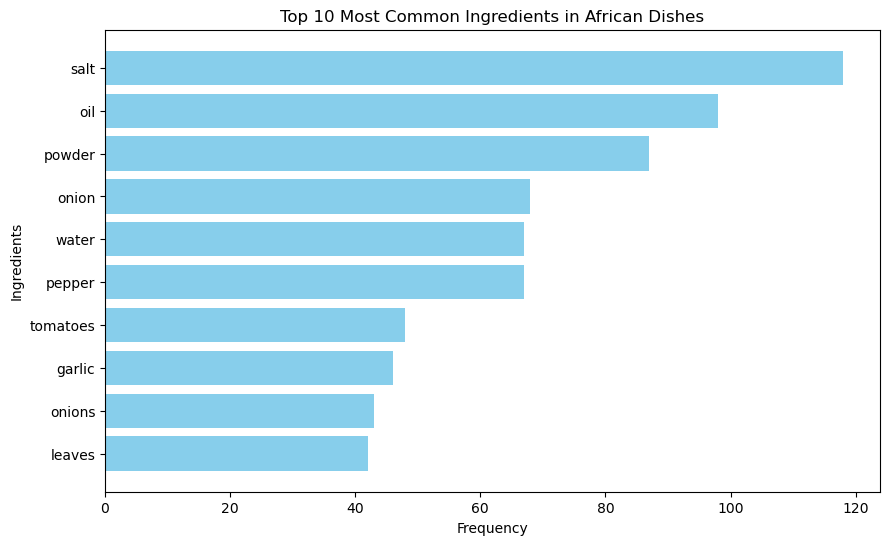

In [44]:

from collections import Counter

# Define stop words and preparation methods to exclude
stop_words = {"to", "taste", "and", "with", "for", "in", "of", "or"}
prep_words = {"chopped", "sliced", "crushed", "diced", "minced"}
measurement_words = {"cup", "cups", "tsp", "tsps", "tbsp", "tbsps", 
                      "g", "mg", "kg", "ml", "l", "oz", "lb", "lbs"}

ingredient_counts = Counter()

for ingredients in African_recipies['ingredients']:
    if isinstance(ingredients, str):
        words = ingredients.lower().replace(',', '').split()
        
        for word in words:
            # Filter out stop words, prep words, and measurements
            if word.isalpha() and word not in stop_words and word not in prep_words and word not in measurement_words:
                ingredient_counts[word] += 1

# Get top 10 ingredients
top_10_ingredients = ingredient_counts.most_common(10)

# Convert to DataFrame for plotting
top_10_df = pd.DataFrame(top_10_ingredients, columns=['Ingredient', 'Count'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_10_df['Ingredient'], top_10_df['Count'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Ingredients')
plt.title('Top 10 Most Common Ingredients in African Dishes')
plt.gca().invert_yaxis()
plt.show()


In [45]:
top_10_df.to_csv("Top 10 African ingridients.csv", index=False)

Most common ingridient in African Dishes is oil

In [46]:
African_recipies

,name,minutes,ingredients,steps,Serving,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,ugali and omena,30,Maize flour\nOmena\nOil\n3 chopped tomatoes\nC...,Step 1\nBoil 3 cups of water add maize flour s...,4.0,91,30,203,29,192,172,182
1,kienyeji fried,25,1 table spoon salt\n2 table spoon cooking vege...,Asemble the vegetables.\nPluck leaves from the...,1.0,230,173,247,196,87,200,239
2,dengu chapati,30,Ndengu\ncubes congets diced in\ncubes carrots ...,Step 1\nSteam the mince meat and add oil then ...,4.0,138,211,131,260,84,75,275
3,ugali matumbo ft african salad,60,400 g Maize flour \n20 g Onions \n11/2 kgMatum...,"Step 1 Bring the water to boil, add the maize ...",4.0,365,259,71,255,205,20,57
4,chicken stew,60,Boiled chicken\n2 Red onion\n1 Spring onion\n4...,Step 1Boil 1 diced potato and 1 diced carrot\...,2.0,171,35,221,109,219,210,125
...,...,...,...,...,...,...,...,...,...,...,...,...
200,african tennis,30,1 cup flour\n1/4 sugar\n1 egg\nPinch salt\n1 t...,"Step 1\nMix flour, sugar, salt, sugar, yeast t...",2.0,729,242,13,119,244,219,17
202,my african salad,10,2 cups dried abacha\n1/2 cube seasoning\n2 tea...,Step 1\nGet a bowl and soak the dried abacha i...,3.0,975,49,139,15,200,193,219
203,sweet mandazi,60,500 g White flour -\n250 ml Milk -\n20 g Bakin...,"Step 1\nIn a bowl, add sieved flour, sugar, ba...",4.0,786,91,294,43,271,192,135
204,roasted guinea fowl parts\nummul-khairi ahmed,60,Guinea fowl parts\nchilli powder\nStar anice p...,Step 1\nWash ur Guinea fawl parts and allow it...,4.0,277,135,296,180,25,252,213


# Correlation between different Nutrients

In [47]:
nutrition_data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,potassium,saturated_fatty_acids
0,0,Cornstarch,100,381,0.1,nan,0,9.00,3.00,0.009
1,1,"Nuts, pecans",100,691,72,6.2,0,0.00,410.00,6.180
2,2,"Eplant, raw",100,25,0.2,nan,0,2.00,229.00,0.034
3,3,"Teff, uncooked",100,367,2.4,0.4,0,12.00,427.00,0.449
4,4,"Sherbet, orane",100,144,2,1.2,1,46.00,96.00,1.160


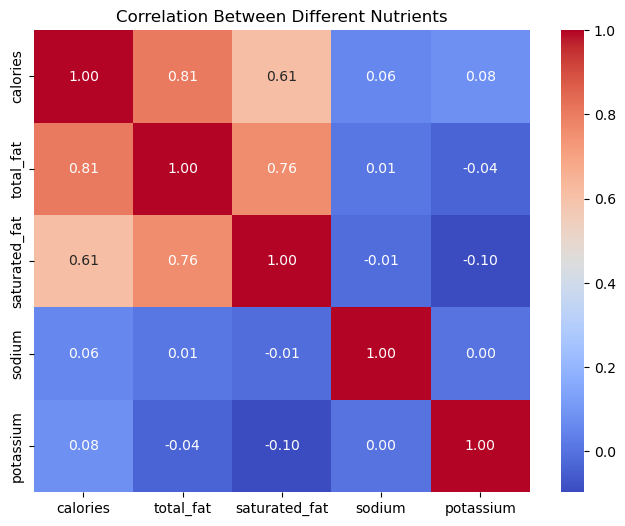

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for nutritional columns
nutrient_columns = ['calories', 'total_fat', 'saturated_fat', 'sodium', 'potassium']
correlation_matrix = nutrition_data[nutrient_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Nutrients')
plt.show()


Calories, total fat, and saturated fat are closely related—foods higher in fat tend to be higher in calories.
Sodium and potassium show little to no correlation with fat and calorie content.
Sodium and saturated fat are mostly independent, meaning a food high in one does not necessarily have high amounts of the other.

# Hypotheses

## 1. Positive Relationship Hypothesis
**Hypothesis:** Higher levels of total fat are associated with increased calorie content and saturated fat in foods.  
**Rationale:** The strong correlations (0.81 and 0.76) suggest that foods high in total fat tend to have higher calories and saturated fat.

## 2. Minimal Impact of Sodium and Potassium
**Hypothesis:** Sodium and potassium levels have limited or negligible relationships with calories, total fat, and saturated fat.  
**Rationale:** The weak correlations (close to 0) indicate that variations in sodium and potassium do not significantly affect the levels of the other nutrients.

## 3. Caloric Density Hypothesis
**Hypothesis:** Foods that are calorically dense are likely to contain higher amounts of total fat and saturated fat.  
**Rationale:** The strong correlation between calories and both types of fat reinforces the idea that higher calorie foods are often those that are higher in fat.


In [49]:
African_recipies.head()

,name,minutes,ingredients,steps,Serving,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,ugali and omena,30,Maize flour\nOmena\nOil\n3 chopped tomatoes\nC...,Step 1\nBoil 3 cups of water add maize flour s...,4.0,91,30,203,29,192,172,182
1,kienyeji fried,25,1 table spoon salt\n2 table spoon cooking vege...,Asemble the vegetables.\nPluck leaves from the...,1.0,230,173,247,196,87,200,239
2,dengu chapati,30,Ndengu\ncubes congets diced in\ncubes carrots ...,Step 1\nSteam the mince meat and add oil then ...,4.0,138,211,131,260,84,75,275
3,ugali matumbo ft african salad,60,400 g Maize flour \n20 g Onions \n11/2 kgMatum...,"Step 1 Bring the water to boil, add the maize ...",4.0,365,259,71,255,205,20,57
4,chicken stew,60,Boiled chicken\n2 Red onion\n1 Spring onion\n4...,Step 1Boil 1 diced potato and 1 diced carrot\...,2.0,171,35,221,109,219,210,125


# What are the top 10 healthiest recipies

# Key Metrics for a Healthy Recipe

## Calories
- **For a main meal:** 400–600 kcal  
- **For a snack:** 100–250 kcal  
- **Check:** High calories with high fat and sugar might indicate unhealthy food.

## Protein (PDV)
- **Higher protein (≥15–20%)** is good for satiety and muscle health.  
- **Check:** `protein (PDV) ≥ 15` is often considered high.

## Total Fat (PDV)
- **Aim for moderate fat**, mostly unsaturated fats.  
- **Check:** `total fat (PDV) ≤ 20` for most meals; avoid high saturated fat.

## Saturated Fat (PDV)
- **Should be low (<10% of daily value)**  
- **Check:** `saturated fat (PDV) ≤ 10`

## Sugar (PDV)
- **Should be minimal** if it's not a dessert.  
- **Check:** `sugar (PDV) ≤ 10`

## Sodium (PDV)
- **High sodium (>20%)** might indicate processed or unhealthy food.  
- **Check:** `sodium (PDV) ≤ 15`

## Carbohydrates (PDV)
- **Look for complex carbs** from whole ingredients.  
- **Check:** `carbohydrates (PDV) ≤ 50` unless it's a carb-focused meal.


C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\325731262.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  African_recipies['name'] = African_recipies['name'].str.lower().str.strip()
C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\325731262.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  African_recipies['name'] = African_recipies['name'].replace({
C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\325731262.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

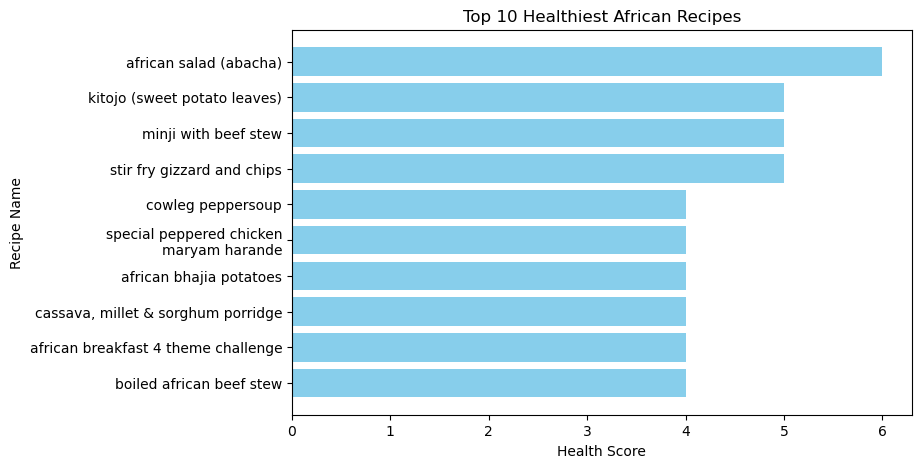

In [50]:
# Getting the healthies food in African Cuisine
# Define a simple health score function
def calculate_health_score(row):
    score = 0

    # Check each condition and add points
    if row['calories'] <= 600:
        score = score + 1
    
    if row['protein (PDV)'] >= 15:
        score = score + 2
    
    if row['total fat (PDV)'] <= 20:
        score = score + 1
    
    if row['saturated fat (PDV)'] <= 10:
        score = score + 1
    
    if row['sugar (PDV)'] <= 10:
        score = score + 1
    
    if row['sodium (PDV)'] <= 15:
        score = score + 1
    
    if row['carbohydrates (PDV)'] <= 50:
        score = score + 1

    return score

# Remove leading/trailing spaces and lowercase all names
African_recipies['name'] = African_recipies['name'].str.lower().str.strip()

# Correct common misspellings and variations manually
African_recipies['name'] = African_recipies['name'].replace({
    'ganished abacha(african salad)': 'african salad (abacha)',
    'african salad': 'african salad (abacha)',
})

# Drop duplicates
African_recipies = African_recipies.drop_duplicates(subset='name')

# Apply the health score function
African_recipies['health_score'] = African_recipies.apply(calculate_health_score, axis=1)

# Sort by health score and get top 10
top_10_healthy_African = African_recipies.sort_values(by='health_score', ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(top_10_healthy_African['name'], top_10_healthy_African['health_score'], color='skyblue')
plt.xlabel('Health Score')
plt.ylabel('Recipe Name')
plt.title('Top 10 Healthiest African Recipes')
plt.gca().invert_yaxis()
plt.show()


In [51]:
top_10_healthy_African.to_csv("Top 10 Healthiest African dishes.csv", index = False)

In [52]:
African_recipies.columns

Index(['name', 'minutes', 'ingredients', 'steps', 'Serving', 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)', 'health_score'],
      dtype='object')

In [53]:
International_recipes.head()

,name,id,minutes,tags,steps,ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ...,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs mil...,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,"['time-to-make', 'course', 'preparation', 'mai...","['brown ground beef in large pot', 'add choppe...",ground beef yellow onions diced tomatoes to...,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,"['60-minutes-or-less', 'time-to-make', 'course...",['place potatoes in a large pot of lightly sal...,spreadable cheese with garlic and herbs new p...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,"['weeknight', 'time-to-make', 'course', 'main-...",['mix all ingredients& boil for 2 1 / 2 hours ...,tomato juice apple cider vinegar sugar salt...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\3406085914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Recipies['health_score'] = Recipies.apply(calculate_health_score, axis=1)


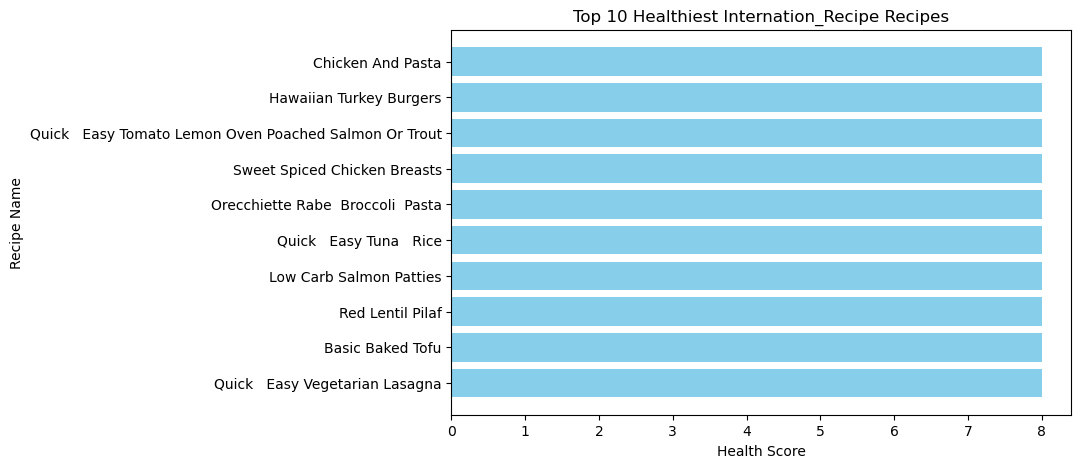

In [54]:
# Standardize text formatting
International_recipes['name'] = International_recipes['name'].str.lower().str.strip()

# Manually correct variations
International_recipes['name'] = International_recipes['name'].replace({
    'breaded turkey cutlets with asiago': 'breaded turkey cutlets',
})

# Drop duplicates
Recipies = International_recipes.drop_duplicates(subset='name')

# Apply the health score function
Recipies['health_score'] = Recipies.apply(calculate_health_score, axis=1)

# Sort by health score and get top 10
top_10_healthy_foreign = Recipies.sort_values(by='health_score', ascending=False).head(10)

# Plot the top 10 healthy recipes by name
plt.figure(figsize=(8, 5))
plt.barh(top_10_healthy_foreign['name'].str.title(), top_10_healthy_foreign['health_score'], color='skyblue')
plt.xlabel('Health Score')
plt.ylabel('Recipe Name')
plt.title('Top 10 Healthiest Internation_Recipe Recipes')  # Fixed the title
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


In [55]:
top_10_healthy_foreign.to_csv("Top 10 healthiest International Dishes.csv", index=False)

# Hypothesis Testing
Null Hypothesis : African Recipies genereally have lower calorie content compared to Internation_Recipe recipies

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

African_calories = African_recipies['calories']
foreign_calories = Recipies['calories']

# Perform the independent t-test (Welch’s T-test for unequal variances)
t_stat, p_value = ttest_ind(African_calories, foreign_calories, equal_var=False)

print(f"T-test Statistic: {t_stat:.3f}")
print(f"P-Value: {p_value:.3f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The difference in calorie content between Africann and Internation_Recipe recipes is statistically significant.")
else:
    print("There is no significant difference in calorie content between African and Internation_Recipe recipes.")


T-test Statistic: 2.120
P-Value: 0.035
The difference in calorie content between Africann and Internation_Recipe recipes is statistically significant.


There is significant difference between the two cuisine calorie content the p value of 0.035 means that the we reject our Null hypothesis

In [57]:
print("African Recipes Avg Calories:", African_calories.mean())
print("Internation_Recipes Avg Calories:", foreign_calories.mean())


African Recipes Avg Calories: 518.6077348066299
Internation_Recipes Avg Calories: 473.84486584645333


Since the mean of the African calorie content is higher than the foreign one we reject our Null hypothesis

In [58]:
# Exporting the international and african data for use in our reccomendation system file
International_recipes.to_csv('cleaned_International_recipies.csv', index=False)

In [59]:
African_recipes.to_csv("cleaned_African_recipes.csv", index=False)

# Sentiment Analysis Analysis
 * After doing sentiment analysis i exported the data for further analysis


In [96]:
# Importing the data
Sentiment_data = pd.read_csv("sentiment_data.csv")
Sentiment_data.head()

,user_id,recipe_id,date,rating,review,name,submitted,description,ingredients,Cleaned_review,Sentiment
0,288985,161466,30/09/2011,4,"Did not have a problem w/ these going ""stale"" ...",peanut butter crispy rice treats,25/03/2006,i found this recipe in the paper the other day...,"['butter', 'sugar', 'light corn syrup', 'peanu...",problem w going stale kept couple days kept we...,1
1,20623,24582,15/09/2003,4,"Very good roast. However, the strong flavors -...",garlic horseradish sirloin roast,08/04/2002,"did this for dinner today, very delicious with...","['top sirloin roast', 'garlic cloves', 'light ...",good roast however strong flavors garlic horse...,1
2,227586,281356,31/08/2008,5,"This was AWESOME! So summery, so quick just o...",fresh tomato and basil pasta with toasted pine...,24/01/2008,this is the essence of summer - fresh tomatoes...,"['penne pasta', 'olive oil', 'onion', 'garlic ...",awesome summery quick top good used fresh toma...,1
3,539686,161549,07/04/2008,4,"I used thawed, frozen peaches and even though ...",whiskey peach smash,27/03/2006,"from the ""king of cocktails"" dale degroff, thi...","['whiskey', 'peach', 'mint leaves', 'lemon', '...",used thawed frozen peaches even though used mu...,1
4,1540883,265601,03/02/2010,0,"Sugar does not belong in cornbread, at least n...",good eats creamed corn cornbread alton brown,13/11/2007,this recipe produces a very light and airy cor...,"['yellow cornmeal', 'kosher salt', 'sugar', 'b...",sugar belong cornbread least real southern cor...,2


In [97]:
International_recipes.rename(columns={'id':'recipe_id'}, inplace=True)

In [98]:
combined_data = pd.merge(International_recipes, Sentiment_data, on="recipe_id", how="inner")

In [99]:
# Combining the International recipe and the  review data
combined_data.head() 

,name_x,recipe_id,minutes,tags,steps,ingredients_x,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,user_id,date,rating,review,name_y,submitted,description,ingredients_y,Cleaned_review,Sentiment
0,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ...,51.5,0.0,13.0,0.0,...,593927,21/08/2010,5,This was a nice change. I used butternut squas...,arriba baked winter squash mexican style,16/09/2005,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",nice change used butternut squash sweet option...,1
1,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ...,51.5,0.0,13.0,0.0,...,178427,05/12/2011,5,Excellent recipe! I used butternut squash and ...,arriba baked winter squash mexican style,16/09/2005,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",excellent recipe used butternut squash sweet o...,1
2,arriba baked winter squash mexican style,137739,55,"['60-minutes-or-less', 'time-to-make', 'course...","['make a choice and proceed with recipe', 'dep...",winter squash mexican seasoning mixed spice ...,51.5,0.0,13.0,0.0,...,4470,18/02/2006,5,I used an acorn squash and recipe#137681 Swee...,arriba baked winter squash mexican style,16/09/2005,autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",used acorn squash recipe sweet mexican spice b...,1
3,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs mil...,173.4,18.0,0.0,17.0,...,319943,18/07/2009,4,"We liked this, but the I only baked for 15 min...",a bit different breakfast pizza,17/06/2002,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",liked baked minutes crust browned bottom could...,1
4,a bit different breakfast pizza,31490,30,"['30-minutes-or-less', 'time-to-make', 'course...","['preheat oven to 425 degrees f', 'press dough...",prepared pizza crust sausage patty eggs mil...,173.4,18.0,0.0,17.0,...,674022,10/04/2011,5,No leftovers here. As Coleen114 mentioned this...,a bit different breakfast pizza,17/06/2002,this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",leftovers coleen mentioned cooks fast minutes ...,1


In [100]:
# Checking for missing values
combined_data.isna().sum()

name_x                 0
recipe_id              0
minutes                0
tags                   0
steps                  0
ingredients_x          0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
user_id                0
date                   0
rating                 0
review                 0
name_y                 0
submitted              0
description            0
ingredients_y          0
Cleaned_review         0
Sentiment              0
dtype: int64

In [101]:
# Checking for duplicates
combined_data.duplicated().sum()

0

In [102]:
# Rename the Sentiment COLUMN
combined_data['Sentiment'] = combined_data['Sentiment'].replace({1:'Positive', 0:'Negative', 2:'Neutral'})
combined_data['Sentiment'].value_counts()

Sentiment
Positive    386515
Negative     12675
Neutral      11147
Name: count, dtype: int64

In [107]:
combined_data.columns

Index(['name_x', 'recipe_id', 'minutes', 'tags', 'steps', 'ingredients_x',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)',
       'user_id', 'date', 'rating', 'review', 'name_y', 'submitted',
       'description', 'ingredients_y', 'Cleaned_review', 'Sentiment',
       'cuisine'],
      dtype='object')

In [ ]:
combined_data

0         ['60-minutes-or-less', 'time-to-make', 'course...
1         ['60-minutes-or-less', 'time-to-make', 'course...
2         ['60-minutes-or-less', 'time-to-make', 'course...
3         ['30-minutes-or-less', 'time-to-make', 'course...
4         ['30-minutes-or-less', 'time-to-make', 'course...
                                ...                        
410332    ['ham', '60-minutes-or-less', 'time-to-make', ...
410333    ['ham', '60-minutes-or-less', 'time-to-make', ...
410334    ['60-minutes-or-less', 'time-to-make', 'course...
410335    ['30-minutes-or-less', 'time-to-make', 'course...
410336    ['30-minutes-or-less', 'time-to-make', 'course...
Name: tags, Length: 410337, dtype: object

# Exploratory Data Analysis (EDA)
### Sentiment Distribution

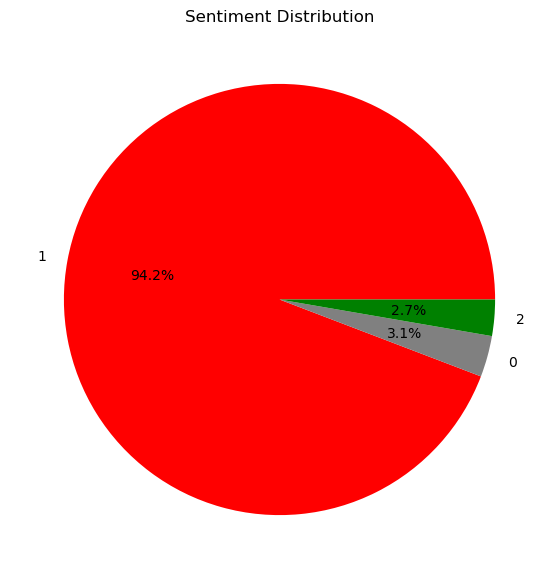

C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\577510771.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['red', 'gray', 'green'])


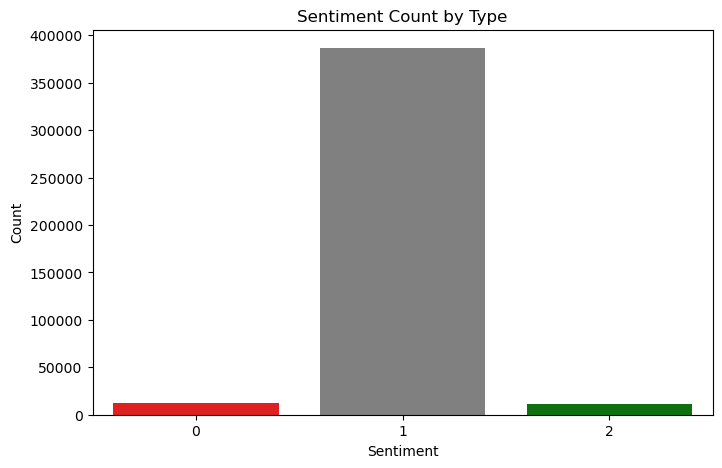

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's already loaded as `df`)
# df = pd.read_csv("your_data.csv")

# Count sentiment occurrences
sentiment_counts = Sentiment_data['Sentiment'].value_counts()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'gray', 'green'])
plt.title("Sentiment Distribution")
plt.show()

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['red', 'gray', 'green'])
plt.title("Sentiment Count by Type")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [112]:
combined_data.columns

Index(['name_x', 'recipe_id', 'minutes', 'tags', 'steps', 'ingredients_x',
       'calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)',
       'user_id', 'date', 'rating', 'review', 'name_y', 'submitted',
       'description', 'ingredients_y', 'Cleaned_review', 'Sentiment',
       'cuisine'],
      dtype='object')

In [124]:
combined_data['Sentiment'].value_counts().to_csv('Sentiment values.csv', index=False)

## Sentiment VS Recipe Attribute

C:\Users\Admin\AppData\Local\Temp\ipykernel_21508\4010019197.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_calories = combined_data.groupby(['calorie_range', 'Sentiment']).size().unstack()


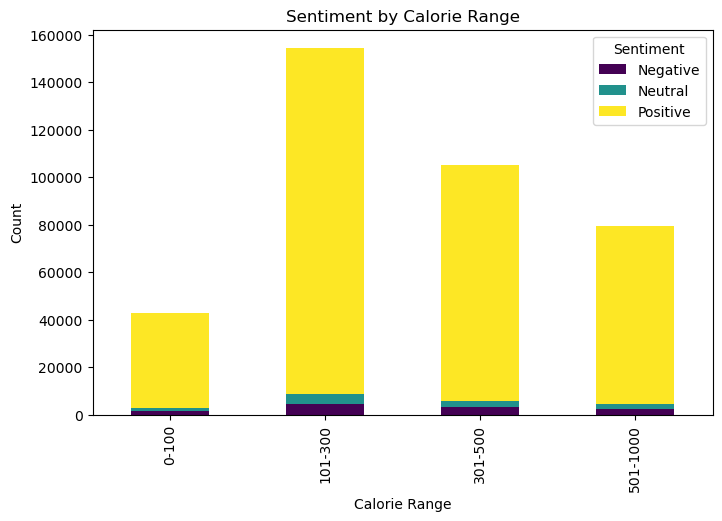

In [113]:
# Create a binned calorie range
combined_data['calorie_range'] = pd.cut(combined_data['calories'], bins=[0, 100, 300, 500, 1000], labels=['0-100', '101-300', '301-500', '501-1000'])

# Count sentiment for each calorie range
sentiment_by_calories = combined_data.groupby(['calorie_range', 'Sentiment']).size().unstack()

# Stacked Bar Chart
sentiment_by_calories.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title("Sentiment by Calorie Range")
plt.xlabel("Calorie Range")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()


This table presents the **distribution of sentiment** (Negative, Neutral, and Positive) across different **calorie ranges** of recipes.  

### **Key Observations:**  
1. **Higher-Calorie Recipes (101-1000 calories)** receive the **most positive feedback**, suggesting consumer preference for richer meals.  
2. **Low-Calorie Recipes (0-100 calories)** also have strong positive sentiment but fewer total reviews.  
3. **Negative and Neutral reviews** are consistently lower across all calorie ranges, indicating overall customer satisfaction.  

### **Possible Actions:**  
- Promote **highly rated** calorie-dense recipes for marketing.  
- Analyze **negative reviews** in each range to identify improvement areas.  
- Explore **health-conscious** options to attract calorie-conscious consumers.  



In [122]:
sentiment_by_calories.to_csv('Sentiment by calories.csv', index=False)

## Sentiment Trend over time

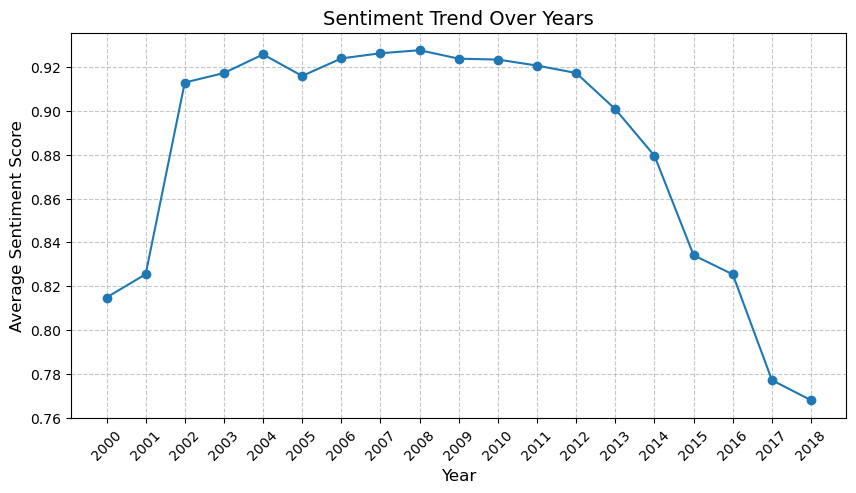

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is in datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'], errors='coerce')

# Drop rows where date conversion failed
combined_data = combined_data.dropna(subset=['date'])

# Convert Sentiment into numerical values (Negative=-1, Neutral=0, Positive=1)
sentiment_mapping = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
combined_data['Sentiment_Score'] = combined_data['Sentiment'].map(sentiment_mapping)

# Drop rows where Sentiment mapping failed
combined_data = combined_data.dropna(subset=['Sentiment_Score'])

# Group by year and calculate the average sentiment score
sentiment_trend = combined_data.groupby(combined_data['date'].dt.to_period('Y'))['Sentiment_Score'].mean()

# Convert PeriodIndex to string format for plotting
sentiment_trend.index = sentiment_trend.index.astype(str)

# Check if sentiment_trend is empty
if sentiment_trend.empty:
    print("No data available for plotting.")
else:
    # Plot the sentiment trend
    plt.figure(figsize=(10, 5))
    plt.plot(sentiment_trend.index, sentiment_trend, marker='o', linestyle='-', markersize=6)

    plt.title("Sentiment Trend Over Years", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel("Average Sentiment Score", fontsize=12)

    # Show all years, rotating labels for readability
    plt.xticks(rotation=45)

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


### **Sentiment Trend Analysis (2000-2018)**  

#### **Key Insights:**  
- **2000-2008:** Sentiment remained high and stable (~0.92), indicating strong customer satisfaction.  
- **2009-2012:** Gradual decline (~0.91), suggesting shifting customer expectations or mild dissatisfaction.  
- **2013-2018:** Significant drop from **0.90 to 0.76**, highlighting a decline in satisfaction.  

#### **Recommendations:**  
- Investigate **2013-2018** for major changes affecting sentiment.  
- Address **customer complaints** and improve **service/product quality**.  
- Conduct a **competitive analysis** to stay ahead in the market.  



In [125]:
# Reset index to include years as a column
sentiment_trend_df = sentiment_trend.reset_index()

# Rename columns for clarity
sentiment_trend_df.columns = ['Year', 'Average_Sentiment_Score']

# Export to CSV
sentiment_trend_df.to_csv("sentiment_trend.csv", index=False)

# Export to Excel
sentiment_trend_df.to_excel("sentiment_trend.xlsx", index=False)


# Data Cleaning